<h1 style="text-align:center">PROGRAMACIÓN LINEAL </h1>

# MÉTODO SIMPLEX
Surgió en la 2da guerra mundial desarrollado por el matemático George Dantzing en el año de 1947.
## EL PROBLEMA
Un autobús que hace el recorrido Cali-Buga, ofrece asientos para fumadores al precio de 10.000 pesos y a no fumadores al precio de 6.000 pesos. Al no fumador se le deja llevar 50 Kg. de peso y al fumador 20 Kg. Si el autobús tiene 90 asientos y admite un equipaje de hasta 3.000 Kg. ¿Cuál ha de ser la oferta de asientos de la compañía para cada tipo de pasajeros, con la finalidad de optimizar el beneficio? Además, debe considerarse que por políticas de la empresa, deben ofrecerse cómo mínimo 10 asientos para pasajeros no fumadores.

### Modelamiento mediante programación lineal
#### Variables

$x$: Cantidad de asientos reservados a fumadores.

$y$: Cantidad de asientos reservados a no fumadores.

#### Restricciones

$20x + 50y \leq 3000$ (Equipaje permitido)

$x + y \leq 90$ (Cantidad de asientos disponibles)

$y \geq 10$ (Política de asientos mínimos para no fumadores)

$y \geq 0$ (No negatividad)

$x \geq 0$ (No negatividad)

#### Función objetivo 

$z = 10000x + 6000y$  (Maximizar)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString

In [4]:
!pip3 install Shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.6 kB/s eta 0:00:0000:0100:01m
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


# MÉTODO GRÁFICO


 COORDENADAS DE LAS INTERSECCIONES
Coordenadas de la primera intersección: POINT (0 60) 
Coordenadas de la segunda intersección: POINT (50 40) 
Coordenadas de la tercera intersección: POINT (80 10) 
Coordenadas de la cuarta intersección: POINT (0 10) 

 EVALUACIÓN DE LA FO EN LOS VÉRTICES
Función objetivo en la intersección 1: 360000.0 pesos
Función objetivo en la intersección 2: 740000.0 pesos
Función objetivo en la intersección 3: 860000.0 pesos
Función objetivo en la intersección 4: 60000.0 pesos

 SOLUCIÓN ÓPTIMA
Solución óptima: 860000.0 pesos

 VARIABLES DE DECISIÓN
Cantidad de asientos a reservar para fumadores: 80.0 
Cantidad de asientos a reservar para no fumadores: 10.0 


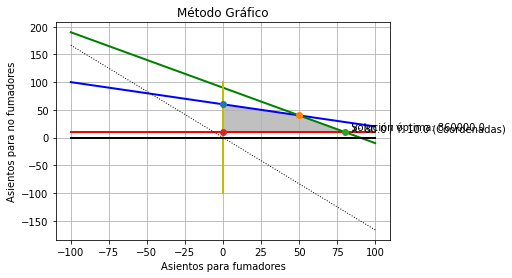

In [1]:
#Autor: Bryan Salazar López, Ing. M.Sc. (2021)
#Librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString

#Ecuaciones e intervalos (Para tabular)
x = np.arange(-100, 150, 50)
y = np.arange(-100, 150, 50)
y1 = (3000 - (20 * x))/ 50
y2 = 90 - x
y3 = 10 + (0 * x)
x1 = 0 * y
y4 = 0 * x
z = (-10000 * x) / 6000

#Identificadores para las líneas
primera_linea = LineString(np.column_stack((x, y1)))
segunda_linea = LineString(np.column_stack((x, y2)))
tercera_linea = LineString(np.column_stack((x, y3)))
cuarta_linea = LineString(np.column_stack((x1, y)))
quinta_linea = LineString(np.column_stack((x, y4)))
sexta_linea = LineString(np.column_stack((x, z)))

#Graficando las líneas
plt.plot(x, y1, '-', linewidth=2, color='b')
plt.plot(x, y2, '-', linewidth=2, color='g')
plt.plot(x, y3, '-', linewidth=2, color='r')
plt.plot(x1, y, '-', linewidth=2, color='y')
plt.plot(x, y4, '-', linewidth=2, color='k')
plt.plot(x, z, ':', linewidth=1, color='k')

#Generando las intersecciones (vértices)
primera_interseccion = cuarta_linea.intersection(primera_linea)
segunda_interseccion = primera_linea.intersection(segunda_linea)
tercera_interseccion = segunda_linea.intersection(tercera_linea)
cuarta_interseccion = tercera_linea.intersection(cuarta_linea)

#Graficando los vértices
plt.plot(*primera_interseccion.xy, 'o')
plt.plot(*segunda_interseccion.xy, 'o')
plt.plot(*tercera_interseccion.xy, 'o')
plt.plot(*cuarta_interseccion.xy, 'o')

#Imprimiendo las coordenadas de los vértices en la consola
print('\n COORDENADAS DE LAS INTERSECCIONES')
print('Coordenadas de la primera intersección: {} '.format(primera_interseccion))
print('Coordenadas de la segunda intersección: {} '.format(segunda_interseccion))
print('Coordenadas de la tercera intersección: {} '.format(tercera_interseccion))
print('Coordenadas de la cuarta intersección: {} '.format(cuarta_interseccion))

#Identificando los valores de las coordenadas x y y de cada vértice
xi1m, yi1m = primera_interseccion.xy
xi2m, yi2m = segunda_interseccion.xy
xi3m, yi3m = tercera_interseccion.xy
xi4m, yi4m = cuarta_interseccion.xy

#Cambiamos el formato de matriz a float
xi1 = np.float64(np.array(xi1m))
xi2 = np.float64(np.array(xi2m))
xi3 = np.float64(np.array(xi3m))
xi4 = np.float64(np.array(xi4m))
yi1 = np.float64(np.array(yi1m))
yi2 = np.float64(np.array(yi2m))
yi3 = np.float64(np.array(yi3m))
yi4 = np.float64(np.array(yi4m))

#Evaluando la función objetivo en cada vértice
FOi1 = (xi1 * 10000) + (yi1 * 6000)
FOi2 = (xi2 * 10000) + (yi2 * 6000)
FOi3 = (xi3 * 10000) + (yi3 * 6000)
FOi4 = (xi4 * 10000) + (yi4 * 6000)

#Imprimiendo las evaluaciones de la FO en cada vértice (Consola)
print('\n EVALUACIÓN DE LA FO EN LOS VÉRTICES')
print('Función objetivo en la intersección 1: {} pesos'.format(FOi1))
print('Función objetivo en la intersección 2: {} pesos'.format(FOi2))
print('Función objetivo en la intersección 3: {} pesos'.format(FOi3))
print('Función objetivo en la intersección 4: {} pesos'.format(FOi4))

#Calculando el mejor resultado (Maximizar)
ZMAX = max(FOi1, FOi2, FOi3, FOi4)

#Imprimiendo la solución óptima en la consola
print('\n SOLUCIÓN ÓPTIMA')
print('Solución óptima: {} pesos'.format(ZMAX))

#Ordenando las coordenadas de los vértices (Las coordenadas x en m y las coordenadas y en n)
m = [xi1, xi2, xi3, xi4]
n = [yi1, yi2, yi3, yi4]

#Graficando el polígono solución a partir de las coordenadas de los vértices 
plt.fill(m, n, color='silver')

#Identificando el índice del vértice de la mejor solución
dict1 = {0:FOi1, 1:FOi2, 2:FOi3, 3:FOi4}
posicion = max(dict1, key=dict1.get)

#Obteniendo las coordenadas del vértice de la mejor solución de acuerdo al índice
XMAX = m[posicion]
YMAX = n[posicion]

#Imprimiendo las coordenadas del vértice de la mejor solución (variables de decisión)
print('\n VARIABLES DE DECISIÓN')
print('Cantidad de asientos a reservar para fumadores: {} '.format(XMAX))
print('Cantidad de asientos a reservar para no fumadores: {} '.format(YMAX))

#Generando las anotaciones de las coordenadas y solución óptima en el gráfico
plt.annotate('  X: {0} / Y: {1} (Coordenadas)'.format(XMAX, YMAX), (XMAX, YMAX))
plt.annotate('  Solución óptima: {}'.format(ZMAX), (XMAX, YMAX+3))


#Configuraciones adicionales del gráfico
plt.grid()
plt.xlabel('Asientos para fumadores')
plt.ylabel('Asientos para no fumadores')
plt.title('Método Gráfico')

plt.show()

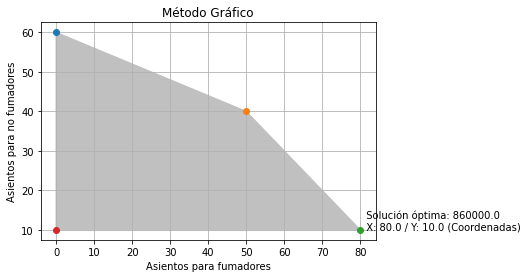

In [3]:
#Generando las intersecciones (vértices)
primera_interseccion = cuarta_linea.intersection(primera_linea)
segunda_interseccion = primera_linea.intersection(segunda_linea)
tercera_interseccion = segunda_linea.intersection(tercera_linea)
cuarta_interseccion = tercera_linea.intersection(cuarta_linea)

#Graficando los vértices
plt.plot(*primera_interseccion.xy, 'o')
plt.plot(*segunda_interseccion.xy, 'o')
plt.plot(*tercera_interseccion.xy, 'o')
plt.plot(*cuarta_interseccion.xy, 'o')

#Configuraciones adicionales del gráfico
plt.grid()
plt.xlabel('Asientos para fumadores')
plt.ylabel('Asientos para no fumadores')
plt.title('Método Gráfico')

#Ordenando las coordenadas de los vértices (Las coordenadas x en m y las coordenadas y en n)
m = [xi1, xi2, xi3, xi4]
n = [yi1, yi2, yi3, yi4]

#Graficando el polígono solución a partir de las coordenadas de los vértices (importante el orden según las manecillas)
plt.fill(m, n, color='silver')

#Generando las anotaciones de las coordenadas y solución óptima en el gráfico
plt.annotate('  X: {0} / Y: {1} (Coordenadas)'.format(XMAX, YMAX), (XMAX, YMAX))
plt.annotate('  Solución óptima: {}'.format(ZMAX), (XMAX, YMAX+3))

plt.show()